In [1]:
import pandas as pd
# import seaborn as sns
import torch
# from matplotlib import pyplot as plt

import pyro
import pyro.distributions as dist
import pyro.ops.stats as stats

# from rethinking import MAP, coef, extract_samples, link, precis, sim, vcov
# sns.set(font_scale=1.25, rc={"figure.figsize": (10, 8)})
# %config InlineBackend.figure_format = 'retina'

In [2]:
import xarray as xr
import hvplot.xarray

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
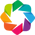

In [3]:
import holoviews as hv
from holoviews import streams
import panel as pn
from holoviews.operation.datashader import datashade, rasterize, dynspread
hv.extension('bokeh') # important: doesn't render without it
hv.opts.defaults( hv.opts.Curve(width=800), hv.opts.Points(width=800),hv.opts.Histogram(width=800), hv.opts.Points(size=3))

import numpy as np

In [18]:
n=30
steps = 32
# create random walk data
pos = torch.empty(n, steps).uniform_(-1, 1).cumsum(1)

# make the first position 0
pos = pos - pos[:,0].unsqueeze(1)


bg_opts = hv.opts.Curve(color='black', alpha=0.1)
fg_opts = hv.opts.Curve(color='blue', alpha=0.3)


pos_da = xr.DataArray(
    pos.numpy(), 
    coords = [('particles', np.arange(30)),('steps',np.arange(32))])

scatterbg = hv.opts.Scatter(color='black', 
                            alpha=0.2,tools=['box_select'], 
                            active_tools=['box_select'], 
                            show_legend=False)
pos_scatter = pos_da.hvplot.scatter().opts(scatterbg)
# pos_scatter

box3 = streams.BoundsXY(source=pos_scatter, bounds=(0,0,0,0))

gconstraints=None

def dyn2(bounds):
    global gconstraints
    s0, y0, s1, y1 = bounds#box2.contents['bounds']
    da_z = pos_da.sel(steps=slice(s0,s1)).stack(z=('steps','particles'))
    sda_z = da_z.sel( z = ((da_z >= y0) & (da_z <= y1)))
    sel_da = sda_z.unstack()
    scatter = sel_da.hvplot.scatter(x='steps')
    p_idx = sel_da.indexes['particles'].to_numpy() ### <<< new technique 
    lines = pos_da.sel(particles=p_idx).hvplot.line(x='steps')
    
#     gconstraints = constraints
        
    return scatter.opts(hv.opts.Scatter(color='red')) * lines

sel_particles_dm = hv.DynamicMap(dyn2, streams=[box3])

pn.Column((sel_particles_dm * pos_scatter).opts(show_legend=False), box3.param.bounds)

Column
    [0] HoloViews(DynamicMap)
    [1] LiteralInput(disabled=True, name='Bounds', value=(0, 0, 0, 0))

In [14]:
pos_da.hvplot.scatter()

:NdOverlay   [particles]
   :Scatter   [steps]   (value)

In [18]:
############ multiple selections
n=30
steps = 32
# create random walk data
pos = torch.empty(n, steps).uniform_(-1, 1).cumsum(1)

# make the first position 0
pos = pos - pos[:,0].unsqueeze(1)


bg_opts = hv.opts.Curve(color='black', alpha=0.1)
fg_opts = hv.opts.Curve(color='blue', alpha=0.3)


pos_da = xr.DataArray(
    pos.numpy(), 
    coords = [('particles', np.arange(30)),('steps',np.arange(32))])

scatterbg = hv.opts.Scatter(color='black', 
                            alpha=0.2,tools=['box_select'], 
                            active_tools=['box_select'], 
                            show_legend=False)
pos_scatter = pos_da.hvplot.scatter().opts(scatterbg)
# pos_scatter

box3 = streams.BoundsXY(source=pos_scatter, bounds=(0,1,0,2))

### do this with a callable object??
gconstraints = None

def dyn2(bounds):
    global gconstraints
    s0, y0, s1, y1 = bounds#box2.contents['bounds']
    step_pos = pos_da.sel(steps=slice(s0,s1))
    sel_particles_ba = ((step_pos >= y0) & (step_pos <= y1)).any(dim='steps')
    sel_particles = pos_da.sel(particles=sel_particles_ba)
   
    constraints = pos_da.sel(particles=sel_particles_ba, steps=slice(s0,s1))
    if constraints.size == 0:
        gconstraints = None
    if  gconstraints is None:
        gconstraints = constraints
    else:
        gconstraints = xr.concat([constraints,gconstraints],dim='particles') 
    
    return (gconstraints.hvplot.scatter().opts(hv.opts.Scatter(color='red')) *  
            sel_particles.hvplot.line().opts(fg_opts))

sel_particles_dm = hv.DynamicMap(dyn2, streams=[box3])

pn.Column((sel_particles_dm * pos_scatter).opts(show_legend=False), box3.param.bounds)

Column
    [0] HoloViews(DynamicMap)
    [1] LiteralInput(disabled=True, name='Bounds', value=(0, 1, 0, 2))

In [20]:
gconstraints

<xarray.DataArray (particles: 1, steps: 2)>
array([[     nan, 5.793853]])
Coordinates:
  * steps      (steps) int64 0 9
  * particles  (particles) int64 22

## attempting multiple constraints


In [75]:
n=30
steps = 32
# create random walk data
pos = torch.empty(n, steps).uniform_(-1, 1).cumsum(1)

# make the first position 0
pos = pos - pos[:,0].unsqueeze(1)


bg_opts = hv.opts.Curve(color='black', alpha=0.1)
fg_opts = hv.opts.Curve(color='blue', alpha=0.3)


pos_da = xr.DataArray(
    pos.numpy(), 
    coords = [('particles', np.arange(30)),('steps',np.arange(32))])

scatterbg = hv.opts.Scatter(color='black', 
                            alpha=0.2,tools=['box_select'], 
                            active_tools=['box_select'], 
                            show_legend=False)
pos_scatter = pos_da.hvplot.scatter().opts(scatterbg)
# pos_scatter

box3 = streams.BoundsXY(source=pos_scatter, bounds=(0,0,0,0))

def dyn2(bounds):
    s0, y0, s1, y1 = bounds#box2.contents['bounds']
    step_pos = pos_da.sel(steps=slice(s0,s1))
    sel_particles_ba = ((step_pos >= y0) & (step_pos <= y1)).any(dim='steps')
    sel_particles = pos_da.sel(particles=sel_particles_ba)#, steps=slice(s0,s1)
    constraints = pos_da.sel(particles=sel_particles_ba, steps=slice(s0,s1))
    
#     if constraints.size == 0:
#         gconstraints = constraints
#     else:
    return (constraints.hvplot.scatter().opts(hv.opts.Scatter(color='red')) *  
            sel_particles.hvplot.line().opts(fg_opts))

sel_particles_dm = hv.DynamicMap(dyn2, streams=[box3])

pn.Column((sel_particles_dm * pos_scatter).opts(show_legend=False), box3.param.bounds)

Column
    [0] HoloViews(DynamicMap)
    [1] LiteralInput(disabled=True, name='Bounds', value=(0, 0, 0, 0))

# New Selector : rectangle draw ?

q: given a path, how do I determine the bounds?
a: min and max of the x and y coords



In [35]:
boxes = hv.Polygons([hv.Box(0, 0, 1), hv.Box(2, 1, 1.5), hv.Box(0.5, 1.5, 1)])
box_stream = streams.BoxEdit(source=boxes, num_objects=3, styles={'fill_color': ['red', 'green', 'blue']})
boxes.opts(
    hv.opts.Polygons(active_tools=['box_edit'], fill_alpha=0.5, height=400, width=400))


:Polygons   [x,y]

In [56]:
np.random.seed(42)
polys = hv.Polygons([hv.Box(*i, spec=np.random.rand()/3, label= str(i))
                     for i in np.random.rand(10, 2)])
ovals = hv.Polygons([hv.Ellipse(*i, spec=np.random.rand()/3)
                     for i in np.random.rand(10, 2)])
poly_edit = streams.PolyEdit(source=polys, vertex_style={'color': 'red'}, shared=True)
poly_edit2 = streams.PolyEdit(source=ovals, shared=True)

(polys * ovals).opts(
    hv.opts.Polygons(active_tools=['poly_edit'], fill_alpha=0.4, height=400, width=400))

:Overlay
   .Polygons.I  :Polygons   [x,y]
   .Polygons.II :Polygons   [x,y]

In [41]:
poly_edit2.data.keys()

dict_keys(['xs', 'ys'])

In [44]:
len(poly_edit2.data['ys'])

10

In [47]:
len(poly_edit2.data['xs'][0])

100

In [62]:
np.array(poly_edit.data['xs'])

array([[0.27256464, 0.27256464, 0.4765156 , 0.4765156 , 0.27256464],
       [0.70874497, 0.70874497, 0.75524292, 0.75524292, 0.70874497]])

In [63]:
np.array(poly_edit.data['xs'])

array([list([0.2171248523165221, 0.2725646363936326, 0.4765156013010924, 0.4765156013010924, 0.2171248523165221]),
       {'0': 0.7087449650360648, '1': 0.7087449650360648, '2': 0.7552429185867454, '3': 0.7552429185867454, '4': 0.7087449650360648}],
      dtype=object)

In [64]:
np.array(poly_edit.data['xs'])

array([list([0.2171248523165221, 0.2725646363936326, 0.4765156013010924, 0.5981494297548587, 0.2171248523165221]),
       {'0': 0.7087449650360648, '1': 0.7087449650360648, '2': 0.7552429185867454, '3': 0.7552429185867454, '4': 0.7087449650360648}],
      dtype=object)

In [65]:
np.array(poly_edit.data['xs'])

array([list([0.2171248523165221, 0.2725646363936326, 0.4765156013010924, 0.5981494297548587, 0.2171248523165221]),
       {'0': 0.7087449650360648, '1': 0.7087449650360648, '2': 0.7552429185867454, '3': 0.7552429185867454, '4': 0.7087449650360648}],
      dtype=object)

In [66]:
poly_edit.data

{'xs': [[0.2171248523165221,
   0.2725646363936326,
   0.4765156013010924,
   0.5981494297548587,
   0.2171248523165221],
  {'0': 0.7087449650360648,
   '1': 0.7087449650360648,
   '2': 0.7552429185867454,
   '3': 0.7552429185867454,
   '4': 0.7087449650360648}],
 'ys': [[0.7995436760473373,
   1.0526897888636462,
   1.0526897888636462,
   0.8519764598815941,
   0.7995436760473373],
  {'0': 0.5754095074216963,
   '1': 0.6219074609723769,
   '2': 0.6219074609723769,
   '3': 0.5754095074216963,
   '4': 0.5754095074216963}]}

In [61]:
hv.Box(2,5, 1)

:Box   [x,y]